<a href="https://colab.research.google.com/github/prad69/MLAssignments/blob/main/Assignment_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handwritten Letters Dataset
###It contains the following info:
#####**The main dataset (letters.zip)**
1650 (50x33) color images (32x32x3) with 33 letters and the file with labels letters.txt.
Photo files are in the .png format and the labels are integers and values.
Additional letters.csv file.
The file LetterColorImages.h5 consists of preprocessing images of this set: image tensors and targets (labels).
#####**The additional dataset (letters2.zip)**
5940 (180x33) color images (32x32x3) with 33 letters and the file with labels letters2.txt.
Photo files are in the .png format and the labels are integers and values.
Additional letters2.csv file.
The file LetterColorImages2.h5 consists of preprocessing images of this set: image tensors and targets (labels).
#####**The additional dataset (letters3.zip)**
6600 (200x33) color images (32x32x3) with 33 letters and the file with labels letters2.txt.
Photo files are in the .png format and the labels are integers and values.
Additional letters3.csv file.
The file LetterColorImages3.h5 consists of preprocessing images of this set: image tensors and targets (labels).
Letter Symbols => Letter Labels
а=>1, б=>2, в=>3, г=>4, д=>5, е=>6, ё=>7, ж=>8, з=>9, и=>10,
й=>11, к=>12, л=>13, м=>14, н=>15, о=>16, п=>17, р=>18, с=>19, т=>20,
у=>21, ф=>22, х=>23, ц=>24, ч=>25, ш=>26, щ=>27, ъ=>28, ы=>29, ь=>30,
э=>31, ю=>32, я=>33

Image Backgrounds => Background Labels
striped=>0, gridded=>1, no background=>2, graph paper=>3

#####**The new version (zip_letters.zip)**
Letter Symbols => Letter Labels
а=>00, б=>01, в=>02, г=>03, д=>04, е=>05, ё=>06, ж=>07, з=>08, и=>09,
й=>10, к=>11, л=>12, м=>13, н=>14, о=>15, п=>16, р=>17, с=>18, т=>19,
у=>20, ф=>21, х=>22, ц=>23, ч=>24, ш=>25, щ=>26, ъ=>27, ы=>28, ь=>29,
э=>30, ю=>31, я=>32

'lowercase'=>00, 'uppercase'=>01

Image Backgrounds => Background Labels
'single-colored paper'=>00, 'striped paper'=>01, 'squared paper'=>02, 'graph paper'=>03



##Question 1
####Import the libraries and extract the dataset from zipped file.

In [1]:
# Remove warning messages
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import random
import zipfile

# navigation and read files
import glob
import os

# Read HDF5 binary data format: convenient for large data storage
import h5py

# Read and display images
import matplotlib.pyplot as plt
import imageio
import cv2
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
#from tensorflow import keras

# DL dependancies
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, LeakyReLU,GlobalMaxPooling2D
from tensorflow.keras.metrics import top_k_categorical_accuracy,categorical_accuracy
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,EarlyStopping

##Question 2
####Import the dataset - 'letters.csv', 'letters2.csv', 'letters3.csv'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

def unzip_folder(zip_path, extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

zip_file_path = '/content/drive/MyDrive/Colab Notebooks/datasets/Handwritten_Letter_Dataset/archive.zip'
extract_directory = '/content/drive/MyDrive/Colab Notebooks/datasets/Handwritten_Letter_Dataset/'

unzip_folder(zip_file_path, extract_directory)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from google.colab import drive
drive.mount('/content/drive')
PATH_TO_DATA = '/content/drive/MyDrive/Colab Notebooks/datasets/Handwritten_Letter_Dataset/'

CSV_FILES =  ['letters.csv', 'letters2.csv', 'letters3.csv']


Mounted at /content/drive


In [3]:
def import_data(CSV_FILE):
    data = pd.read_csv(PATH_TO_DATA + CSV_FILE)
    # Create path extention for corresponding folders that contains images
    data['source'] = CSV_FILE[:-4]+'/'
    return data

In [4]:
data1 = import_data(CSV_FILES[0])
data2 = import_data(CSV_FILES[1])
data3 = import_data(CSV_FILES[2])
data = pd.concat([data1, data2, data3], ignore_index=True)

# I won't use these data anymore
del(data1, data2, data3)

In [5]:
data = shuffle(data, random_state = 42)
data

,letter,label,file,background,source
6491,щ,27,27_212.png,2,letters2/
2012,в,3,03_53.png,2,letters2/
13295,ы,29,29_336.png,3,letters3/
11270,с,19,19_311.png,3,letters3/
12837,щ,27,27_278.png,3,letters3/
...,...,...,...,...,...
5191,т,20,20_172.png,2,letters2/
13418,ь,30,30_259.png,3,letters3/
5390,у,21,21_191.png,2,letters2/
860,р,18,18_11.png,0,letters/


In [6]:
# Get all labels in one string
letters = ''
for letter in data.letter.unique():
    letters += letter

# Which letter is written on each image
labels = data.label
labels

6491     27
2012      3
13295    29
11270    19
12837    27
         ..
5191     20
13418    30
5390     21
860      18
7270     32
Name: label, Length: 14190, dtype: int64

In [7]:
def ohe_letters(label):
    '''
    One hot encoding for the target label
    '''
    resu = np.zeros(len(letters))
    index = letters.index(label)
    resu[index] = 1
    return resu

def ohe_backgrounds(label):
    '''
    One hot encoding for background column
    '''
    resu = np.zeros(len(data.background.unique()))
    resu[label] = 1
    return resu

In [8]:
data['encoded_letter'] = data['letter'].apply(lambda x:ohe_letters(x))
data['encoded_background'] = data['background'].apply(lambda x:ohe_backgrounds(x))

In [9]:
data.head()

,letter,label,file,background,source,encoded_letter,encoded_background
6491,щ,27,27_212.png,2,letters2/,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 1.0, 0.0]"
2012,в,3,03_53.png,2,letters2/,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 1.0, 0.0]"
13295,ы,29,29_336.png,3,letters3/,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 1.0]"
11270,с,19,19_311.png,3,letters3/,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 1.0]"
12837,щ,27,27_278.png,3,letters3/,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 1.0]"


In [ ]:
# Store all png images into one numpy array
images = []
# Will be the target
encoded_labels = []

backgrounds = []
encoded_backgrounds = []

# I want to be sure that every image is consitent
for i, row in data.iterrows():
    img_name = row['file']
    numpy_image = cv2.imread(os.path.join(PATH_TO_DATA + row['source'], img_name))
    if numpy_image is not None and numpy_image.shape == (32, 32, 3):
        print(len(images))
        images.append(numpy_image)
        encoded_labels.append(row['encoded_letter'])
        backgrounds.append(row['background'])
        encoded_backgrounds.append(row['encoded_background'])

# Normalize array of images
images = np.array(images)/255

##Question 3
####Perform EDA on the datsaet to understand the data.

In [28]:
def display_image(images_list, list_of_labels = np.arange(9)):

    # plot first few images
    plt.figure(figsize=(12,12))
    for index in list_of_labels:

        # Get corresponding label
        ohe_label = encoded_labels[index]
        index_letter = list(ohe_label).index(1)
        associated_letter = letters[index_letter]

        # Get background
        associated_background = backgrounds[index]


        # define subplot
        plt.subplot(330 + 1 + index)
        plt.title('Label: %s \n'%associated_letter+\
                 'Background: %s\n'%associated_background,
                 fontsize=18)
        # plot raw pixel data
        plt.imshow(images[index])

    plt.subplots_adjust(bottom = 0.001)  # the bottom of the subplots of the figure
    plt.subplots_adjust(top = 0.99)
    # show the figure
    plt.show()

In [ ]:
display_image(images)

##Question 4
####Extract the information to train the model from the dataset.

In [29]:
# Define X_data and target
X = np.array(images.copy())
y = np.array(encoded_labels.copy())

# Stratified train_test split on labels
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                  test_size=.2,
                                                  stratify = y,
                                                  random_state=42)

##Question 5
####Train the CNN model.

In [30]:
# Define image dimensions
IMG_ROWS = 32
IMG_COLS = 32
# 3 stands for RGB images, 1 if greyscaled images
INPUT_SHAPE = (IMG_ROWS, IMG_COLS, 3)

# Number of classes to consider
NUM_CLASSES = len(letters)
# Group of training samples
BATCH_SIZE = 64
# Number of complete presentations of the dataset to be learned
EPOCHS = 10

In [31]:
def top_3_categorical_accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=3)

In [32]:
def CNN_model(activation = 'softmax',
              loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy', top_3_categorical_accuracy]):

    model = Sequential()
    model.add(Conv2D(32, kernel_size = (3, 3),
                     activation = 'relu',
                     input_shape = INPUT_SHAPE))
    model.add(Conv2D(64, (3, 3), activation = 'relu'))
    model.add(Conv2D(128, (4, 4), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation = 'relu'))
    model.add(Dropout(0.25))
    model.add(Dense(NUM_CLASSES, activation = activation))

    # Compile the model
    model.compile(loss = loss,
                  optimizer = optimizer,
                  metrics = metrics)

    return model

In [33]:
# Init CNN model
cnn_model = CNN_model()

# Save weights only for best model
checkpointer = ModelCheckpoint(filepath = 'weights.best.letters.hdf5',
                               verbose = 2,
                               save_best_only = True)

# Reduce learning rate when a metric has stopped improving
lr_reduction = ReduceLROnPlateau(monitor='val_loss',
                                 patience=10,
                                 verbose=2,
                                 factor=.75)

# If score doesn't improve during patience=20 epochs, stop learning
estopping = EarlyStopping(monitor='val_loss',
                          patience=20,
                          verbose=2)

# Training
history = cnn_model.fit(X_train, y_train,
                        batch_size = BATCH_SIZE,
                        epochs = EPOCHS,
                        verbose = 1,
                        validation_data = (X_val, y_val),
                        callbacks = [checkpointer, lr_reduction, estopping])

Epoch 1/10
178/178 [==============================] - ETA: 0s - loss: 3.4398 - accuracy: 0.0472 - top_3_categorical_accuracy: 0.1336
Epoch 1: val_loss improved from inf to 3.30865, saving model to weights.best.letters.hdf5
178/178 [==============================] - 9s 18ms/step - loss: 3.4398 - accuracy: 0.0472 - top_3_categorical_accuracy: 0.1336 - val_loss: 3.3087 - val_accuracy: 0.0825 - val_top_3_categorical_accuracy: 0.2207 - lr: 0.0010
Epoch 2/10
177/178 [============================>.] - ETA: 0s - loss: 2.7933 - accuracy: 0.2179 - top_3_categorical_accuracy: 0.4283
Epoch 2: val_loss improved from 3.30865 to 2.20269, saving model to weights.best.letters.hdf5
178/178 [==============================] - 2s 14ms/step - loss: 2.7934 - accuracy: 0.2176 - top_3_categorical_accuracy: 0.4284 - val_loss: 2.2027 - val_accuracy: 0.3850 - val_top_3_categorical_accuracy: 0.6273 - lr: 0.0010
Epoch 3/10
175/178 [============================>.] - ETA: 0s - loss: 2.2541 - accuracy: 0.3519 - top_3_

##Question 6
####Plot the prediction vs true label to check the labels.

In [34]:
# loading the model with the best validation accuracy
cnn_model.load_weights('weights.best.letters.hdf5')
cnn_model.evaluate(X_val, y_val)

89/89 [==============================] - 1s 4ms/step - loss: 0.8070 - accuracy: 0.7666 - top_3_categorical_accuracy: 0.9122


[0.8070281744003296, 0.7665726542472839, 0.9122002720832825]

In [35]:
def load_image(path_filename):
	# load the image
	img = load_img(path_filename, target_size=(32, 32))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 1 channel
	img = img.reshape(1, 32, 32, 3)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img

In [36]:
def get_true_label(path_filename, dataframe, column_to_get):
    filename = os.path.basename(os.path.normpath(path_filename))
    index_row = data[data['file']==filename].index[0]
    return data.loc[index_row, column_to_get]

In [37]:
img = load_image(PATH_TO_DATA+'letters3/01_235.png')

1/1 [==============================] - 0s 300ms/step
true label: а


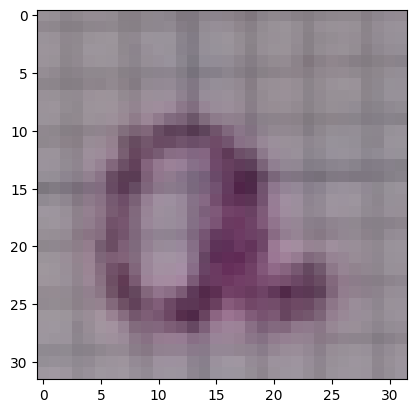

In [38]:
# predict the class
a_letter = cnn_model.predict(img)

plt.imshow(img[0])
print('true label:', get_true_label(PATH_TO_DATA+'letters3/01_235.png', data, 'letter'))

In [39]:
def load_random_images(number_of_images_to_load = 9):
    images = []
    true_labels = []
    true_backgrounds = []

    which_folder = [random.randint(1,3) for _ in range(number_of_images_to_load)]
    for index_folder in which_folder:
        if index_folder == 1:
            path = PATH_TO_DATA+'letters/'
        else:
            path = PATH_TO_DATA+'letters'+str(index_folder)+'/'
        nb_files = len(os.listdir(path))

        index_image = random.randint(0, len(os.listdir(path)))

        image = load_image(path + os.listdir(path)[index_image])
        label = get_true_label(path + os.listdir(path)[index_image], data, 'letter')
        background = get_true_label(path + os.listdir(path)[index_image], data, 'background')

        images.append(image)
        true_labels.append(label)
        true_backgrounds.append(background)

    return images, true_labels, true_backgrounds

In [40]:
def classes_predictions(images_list_to_classify, true_labels, model):

    # plot first few images
    plt.figure(figsize=(12,12))
    for index, image in enumerate(images_list_to_classify):

        #a_letter = model.predict(image)
        #letter_arr = np.array([a_letter])
        #associated_letter = letters[int(letter_arr[0])]

        # define subplot
        plt.subplot(330 + 1 + index)
        plt.title('True Label: %s\n'%true_labels[index],
                 fontsize=18)
        # plot raw pixel data
        plt.imshow(image[0])

    plt.subplots_adjust(bottom = 0.001)  # the bottom of the subplots of the figure
    plt.subplots_adjust(top = 0.99)

    # show the figure
    plt.show()

In [41]:
test_images, true_labels, true_backgrounds = load_random_images()

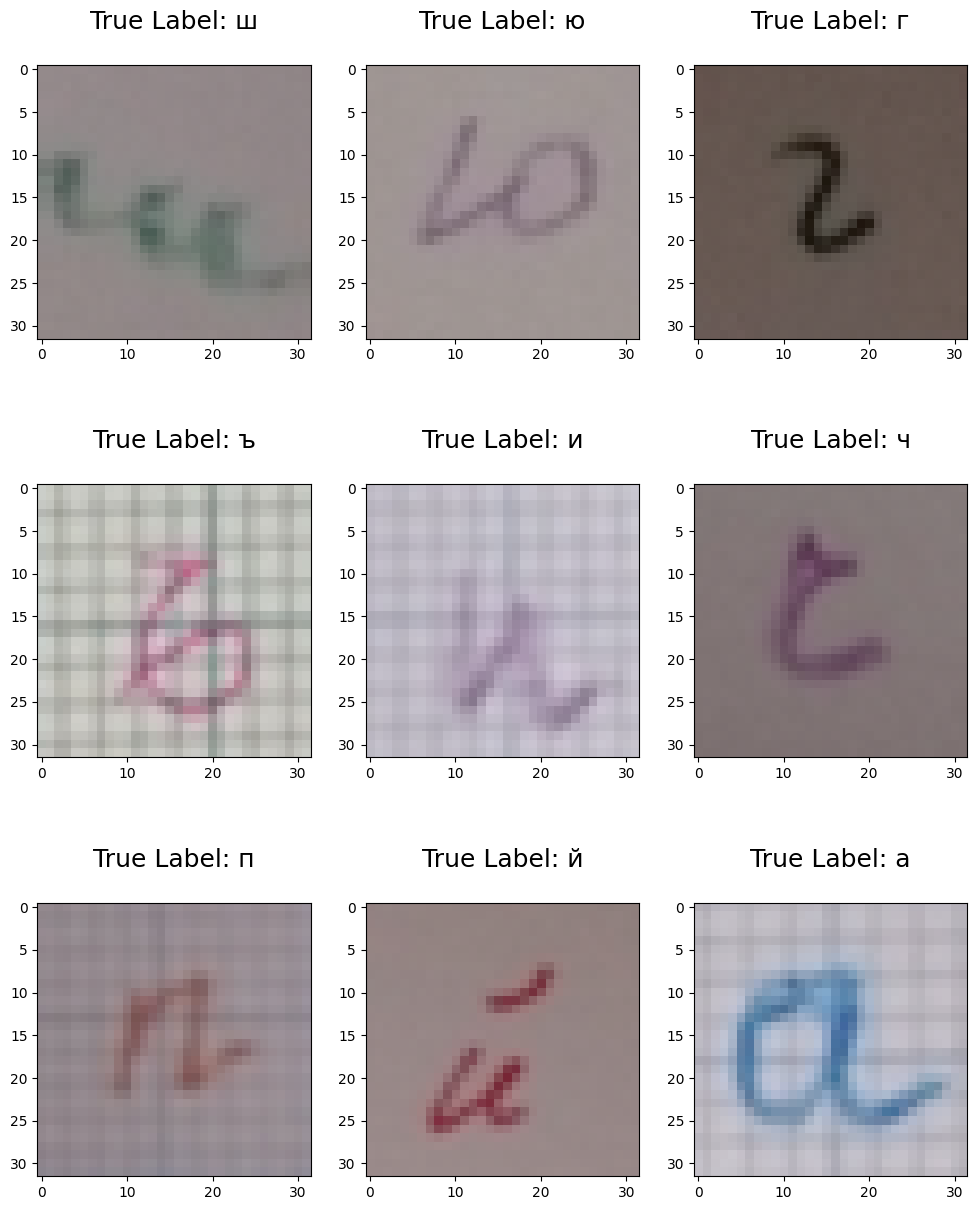

In [42]:
classes_predictions(test_images, true_labels, cnn_model)